# Introduction

- This dataset looks at shooting from 2013 to 2017. 
- The data comes from https://www.massshootingtracker.org/
- This data includes 1897 shooting in America over the past five years.
- This dataset looks at 2445 fatalities and 7384 wounded victims.
- This data was in five separate .csv files and merged together using rbind() to create one file.

https://www.massshootingtracker.org/data/all

In [20]:
library(ggplot2)
library(dplyr)
library(stringr)
library(forcats)
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [21]:
mass <- read.csv("/home/james/Downloads/shooting/shooting.csv", header = TRUE)

In [22]:
head(mass)

X,date,name_semicolon_delimited,killed,wounded,city,state,sources_semicolon_delimited
1,1/1/2013,Unknown,1,3,Hawthorne,CA,http://losangeles.cbslocal.com/2013/01/01/man-killed-3-wounded-at-nye-party-in-hawthorne/;http://latimesblogs.latimes.com/lanow/2013/01/hawthorne-new-year-party-three-killed.html
2,1/1/2013,Desmen Noble;Damian Bell,1,4,Lorain,OH,http://www.wkyc.com/news/article/276177/3/Lorain-Arrest-made-in-gas-station-shooting;http://chronicle.northcoastnow.com/2013/02/14/2-men-indicted-in-new-years-day-lorain-murder/;http://morningjournal.com/articles/2013/02/22/news/cops_and_courts/doc5126fa31928a4356439484.txt
3,1/1/2013,Julian Sims,0,4,McKeesport,PA,http://pittsburgh.cbslocal.com/2013/01/01/4-people-shot-in-mckeesport/;http://www.wtae.com/news/local/allegheny/U-S-Marshals-task-force-arrests-New-Year-s-party-shooting-suspect/-/10927008/17977588/-/1ydqtj/-/index.html
4,1/1/2013,Carlito Montoya,2,3,Sacramento,CA,http://sacramento.cbslocal.com/2013/01/01/4-shot-during-new-years-eve-gathering-in-old-sacramento/;http://www.kcra.com/news/Police-2-dead-3-hurt-during-Old-Sac-bar-shooting/17963494
5,1/5/2013,Sonny Archuleta,4,0,Aurora,CO,http://www.dailydemocrat.com/ci_22322664/aurora-shooter-was-frenetic-talented-neighbor-says;http://denver.cbslocal.com/2013/01/06/officer-told-neighbor-standoff-gunman-was-on-meth-binge/
6,1/7/2013,Cedric;James Poore,4,0,Tulsa,OK,http://usnews.nbcnews.com/_news/2013/01/07/16397584-police-four-women-found-dead-in-tulsa-okla-apartment?lite;http://www.cbsnews.com/8301-504083_162-57577466-504083/tulsa-apartment-murders-update-hearing-scheduled-for-brothers-charged-in-quadruple-killing/


What states have the most shooting over the past five years?

In [25]:
state <- fct_collapse(mass$state, "AK" = "AK",
                      "AL" = "AL",
                      "AR" = "AR",
                      "AZ" = c("AZ", "Az"),
                      "CA" = c("CA", "Ca"),
                      "CO" = "CO",
                      "CT" = "CT",
                      "D.C." = c("D.C.", "DC"),
                      "DE" = "DE",
                      "FL" = c ("FL", "Fl"),
                      "GA" = c("GA", "Ga"),
                      "IA" = "IA",
                      "ID" = "ID",
                      "IL" = c("IL", "Il"),
                      "IN" = c("IN", "In"),
                      "KS" = "KS",
                      "KY" = "KY",
                      "LA" = "LA",
                      "MA" = c("MA", "Ma"),
                      "MD" = "MD",
                      "ME" = "ME",
                      "MI" = c("MI", "Mi"),
                      "MN" = "MN",
                      "MO" = c("MO", "Mo"),
                      "MS" = "MS",
                      "MT" = "MT",
                      "NC" = "NC",
                      "ND" = "ND",
                      "NE" = "NE",
                      "NJ" = "NJ",
                      "NM" = "NM",
                      "NV" = "NV",
                      "NY" = "NY",
                      "OH" = "OH",
                      "OK" = c("OK", "Ok"),
                      "OR" = "OR",
                      "PA" = "PA",
                      "Puerto Rico" = c("Puerto Rico", "PR"),
                      "RI" = "RI",
                      "SC" = "SC",
                      "SD" = "SD",
                      "TN" = "TN",
                      "TX" = c("TX", "Tx"),
                      "UT" = "UT",
                      "VA" = "VA",
                      "VT" = "VT",
                      "WA" = "WA",
                      "WI" = "WI",
                      "WV" = "WV",
                      "WY" = "WY")

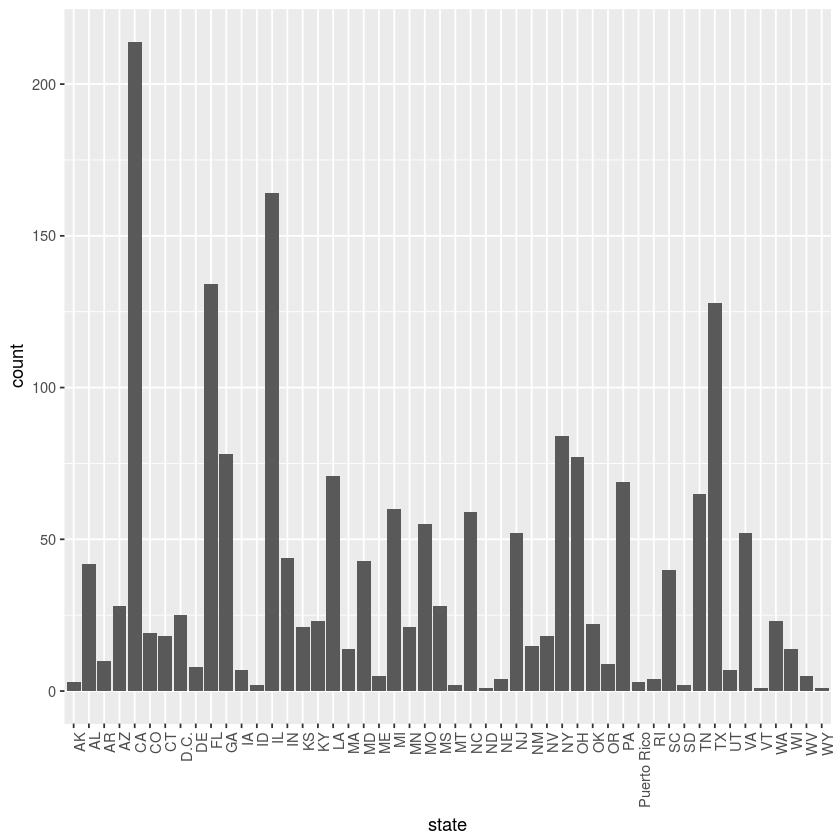

In [26]:
qplot(state) + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

This plot shows that over the past five years CA (California) has had over two hundred shooting. With FL (Florida), IL (Illinois) and TX (Texas) having had over one hundred shooting in the past five years.

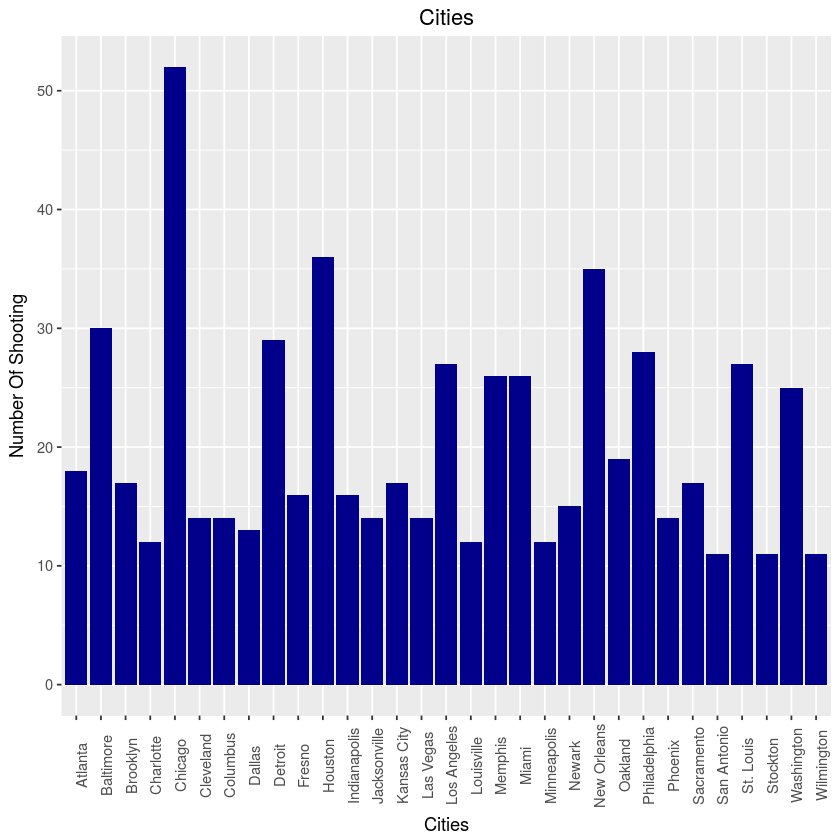

In [48]:
city <- mass %>%
  count(mass$city)

city <- subset(city, city$n > 10)

ggplot(city, aes(city$`mass$city`, city$n)) + 
  geom_bar(stat = "identity", fill = "darkblue") +
  theme(axis.text.x = element_text(angle = 90)) +
  xlab("Cities") +
  ylab("Number Of Shooting") +
  ggtitle("Cities") +
  theme(plot.title = element_text(hjust = 0.5))

This plot shows that thirty-one cities have had 10 or more shooting in the last five years. With Chicago having over fifty shooting in the last five years and Baltimore, Houston and New Orleans having over thirty shooting in the last five years.

# Dates

Are there any patterns from the dates when shooting are likely to occur?

In [27]:
mass$date <- as.Date(paste(mass$date), "%m/%d/%Y")

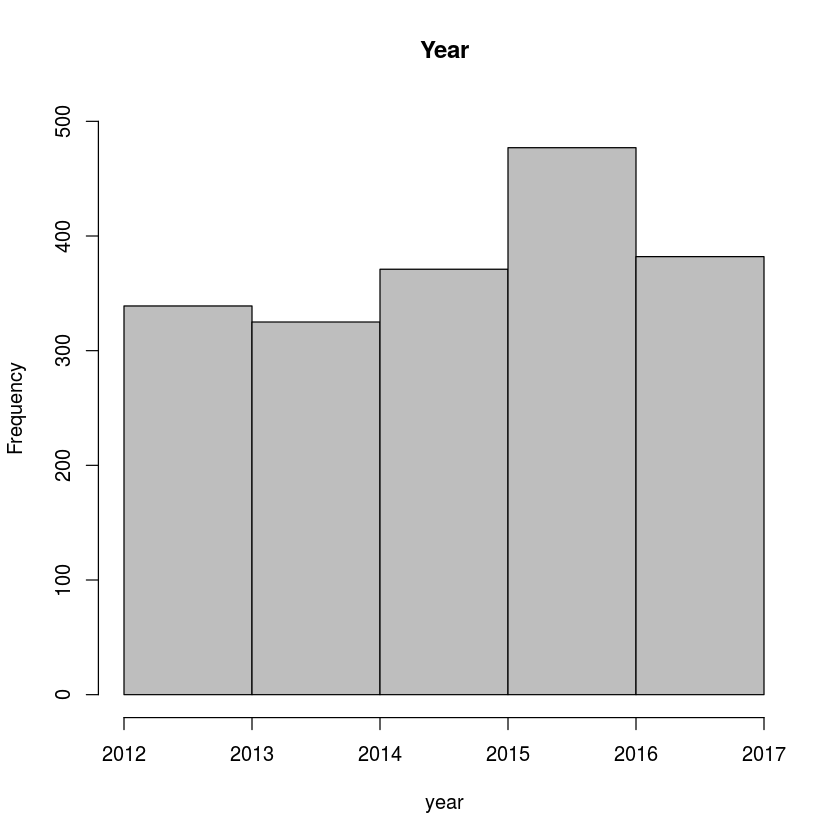

In [28]:
year <- str_sub(mass$date,1, 4)
year <- as.numeric(year)
years <- c(2012:2017)
hist(year, 
     col = "grey", 
     main = "Year",
     ylim = c(0, 500),
     breaks = years)

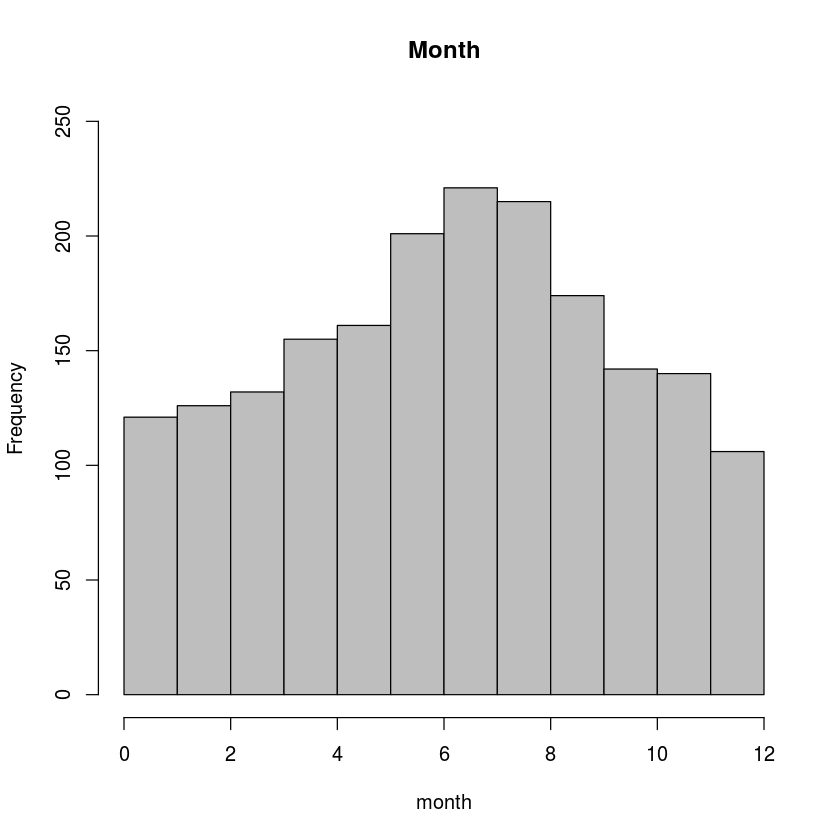

In [29]:
month <- str_sub(mass$date, 6, 7)
month <- as.numeric(month)
months <- c(0:12)
hist(month, 
     col = "grey", 
     main = "Month",
     ylim = c(0, 250),
     breaks=months)

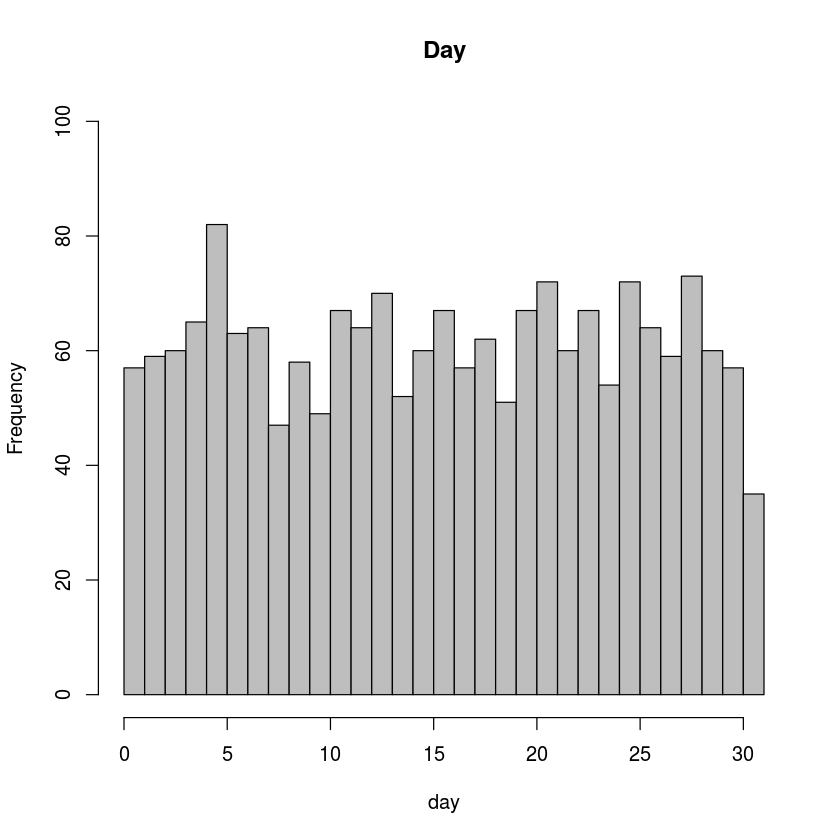

In [30]:
day <- str_sub(mass$date,9,10)
day <- as.numeric(day)
days <- c(0:31)
hist(day, 
     col = "grey", 
     main = "Day", 
     ylim = c(0, 100),
     breaks=days)

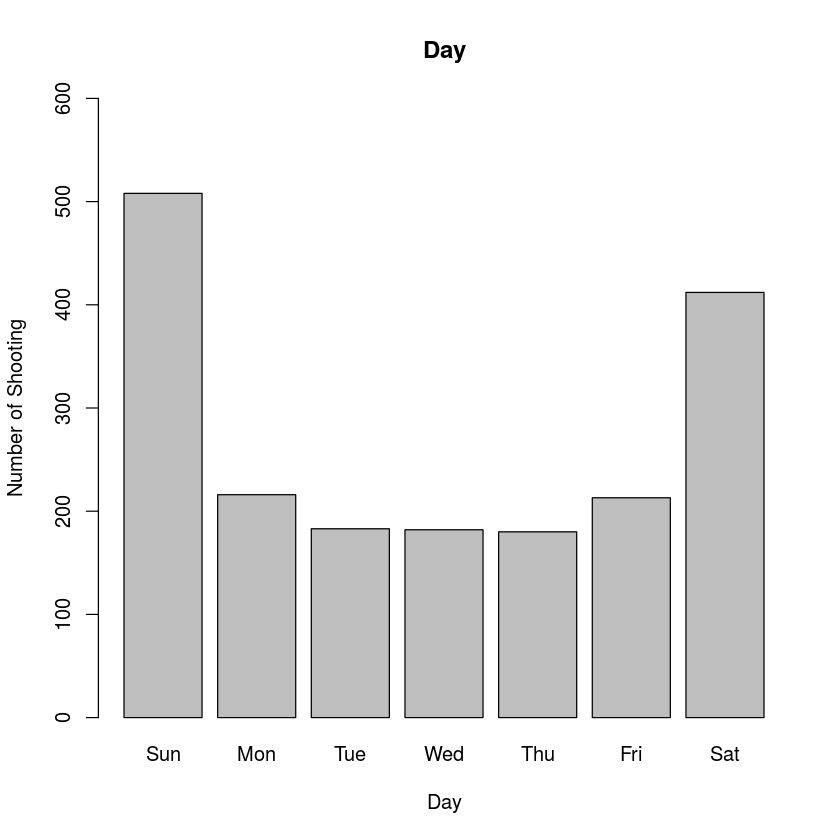

In [31]:
weekday <- as.Date(mass$date)
wday <- wday(weekday)
freqs <- aggregate(weekday ~ wday, FUN=length)
barplot(freqs$weekday,
        main = "Day",
        ylab = "Number of Shooting", 
        xlab = "Day",
        ylim=c(0,600),
        names.arg = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"))

- This date that focuses on dates that the shooting are carried out show several interesting features. 
- Firstly, there was a significant jump in shooting between 2014 (325) and 2016 (477). 
- Secondly, it would appear that the majority of shooting occur over the summer months more interestingly December has the least shooting over the past five years. 
- There appears to be no trend for specific days that shooting are likely to occur. 
- Finally, nearly 50 percent (48.57%) of all shooting occur on the weekend compared to a weekday.

# Vicitms

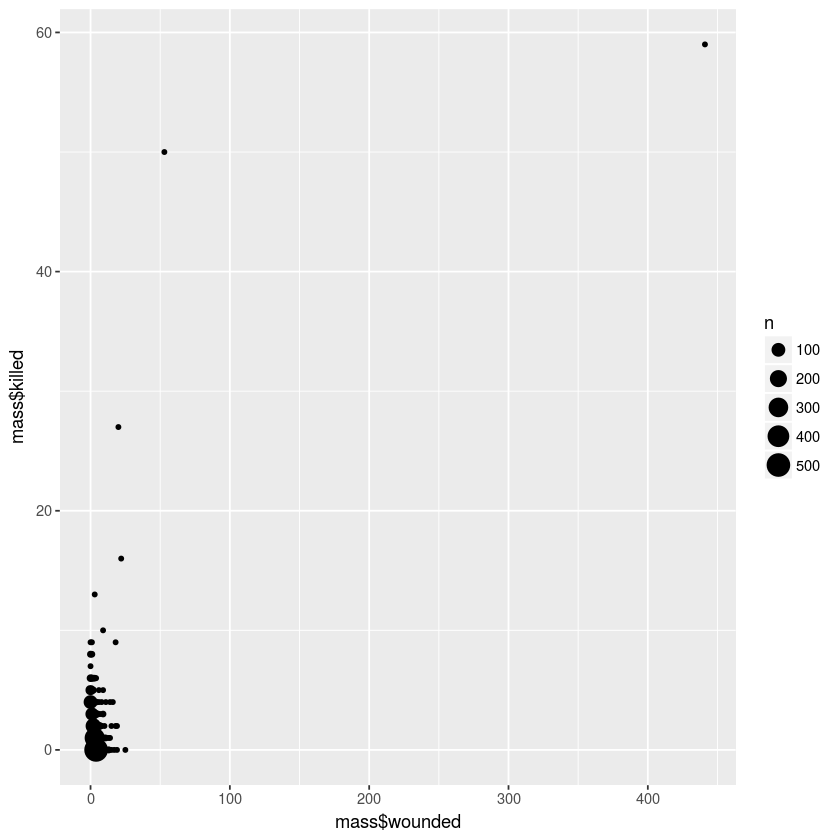

In [36]:
ggplot(mass, aes(mass$wounded, mass$killed)) + geom_count()

The vast majority of shooting are low in victim count, apart from several in the past couple of months that have a high mortality rate. This would also suggest that large scale mass shooting are very rare 10+ fatalities are rare

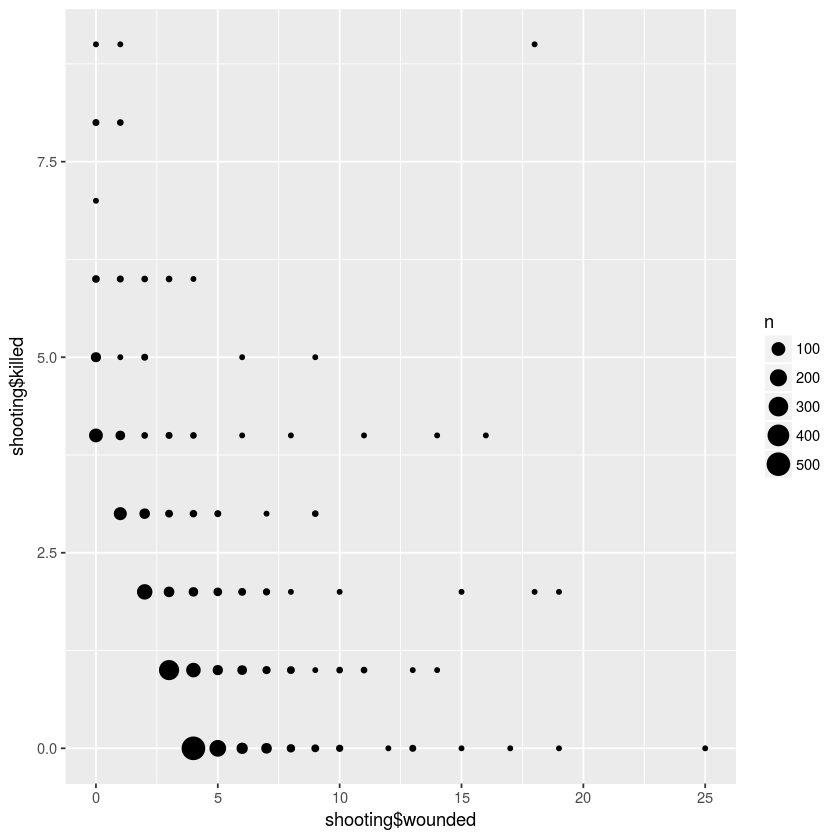

In [49]:
shooting <- subset(mass, mass$killed < 10)
ggplot(shooting, aes(shooting$wounded, shooting$killed)) + 
geom_count()

This plot removes 4 of the high victim crimes to focus on crime with 10 or less fatalities. This shows that the highest number of crimes had the lowest number of fatalities. 
This also shows that 99.8 percent of all shooting has less then 10 fatalities and 25 wounded victims.

# Limitation

- One limation with this data is the lack of detail for each shooting this limits the amount of analysis beyond location, dates and victims.

# Conclusion

- In conclusion, this data does suggest certain patterns for dates and location. 
- For example, California has had the highest number of shooting in the past five years. However, Chicago as a city has had the largest number of shooting.
- The pattern from the date shows that shooting are more common in the summer compared to the winter, also the 50 percent of shooting occur at the weekend compared to a weekday.
- This data also suggest that mass shooting with ten of more victims is rare with 99.8 percent of all shooting having less than 10 fatalities and 25 wounded victims.